In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
df=pd.read_csv("solarpowergeneration.csv")
df

distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                          8.0   
1             0        10.0        77                          5.0   
2             0        10.0        70                          0.0   
3             0        10.0        33                          0.0   
4             0        10.0        21                          3.0   
...         ...         ...       ...                          ...   
2915          4        10.0        75                         10.0   
2916          1        10.0        66                         15.0   
2917          2        10.0        68                         21.0   
2918          2        10.0        81                         17.0   
2919          1        10.0        81                         11.0   

      average-pressure-(period)  power-generated  
0                         29.82                0  
1                         29.85                0  
2                         29.89             5418  
3                         29.91            25477  
4                         29.89            30069  
...                         ...              ...  
2915                      29.93             6995  
2916                      29.91            29490  
2917                      29.88            17257  
2918                      29.87              677  
2919                      29.90                0  

[2920 rows x 10 columns]

# EDA

In [2]:
df.head()

distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2                      29.89             5418  
3                      29.91            25477  
4                      29.89            30069

In [3]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [5]:
df.describe()

distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.000000     0.000000    14.000000                     0.000000   
25%       1.000000    10.000000    65.000000                     5.000000   
50%       2.000000    10.000000    77.000000                     9.000000   
75%       3.000000    10.000000    84.000000                    15.000000   
max       4.000000    10.000000   100.000000                    40.000000   

       average-pressure-(period)  power-generated  
count                2920.000000      2920.000000  
mean                   30.017760      6979.846233  
std                     0.142006     10312.336413  
min                    29.480000         0.000000  
25%                    29.920000         0.000000  
50%                    30.000000       404.000000  
75%                    30.110000     12723.500000  
max                    30.530000     36580.000000

In [6]:
# Descriptive statistics
print("Skewness of target variable:", df['power-generated'].skew())
print(df.corr())  # Checking correlations

Skewness of target variable: 1.3070350643796376
                             distance-to-solar-noon  temperature  \
distance-to-solar-noon                     1.000000    -0.145207   
temperature                               -0.145207     1.000000   
wind-direction                            -0.118010     0.342146   
wind-speed                                -0.145073     0.096267   
sky-cover                                 -0.015184    -0.230672   
visibility                                 0.065807     0.194110   
humidity                                   0.368964    -0.221463   
average-wind-speed-(period)               -0.214891     0.054546   
average-pressure-(period)                  0.082505    -0.435723   
power-generated                           -0.746681     0.132193   

                             wind-direction  wind-speed  sky-cover  \
distance-to-solar-noon            -0.118010   -0.145073  -0.015184   
temperature                        0.342146    0.096267  -0.230

In [7]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [8]:
df['average-wind-speed-(period)'].mean()

10.129153819801301

In [9]:
df['average-wind-speed-(period)'].median()

9.0

In [10]:
## we will replace null value with median
median=df['average-wind-speed-(period)'].median()
df.fillna(median,inplace=True)

In [11]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64

In [12]:
import seaborn as sns

# Histogram

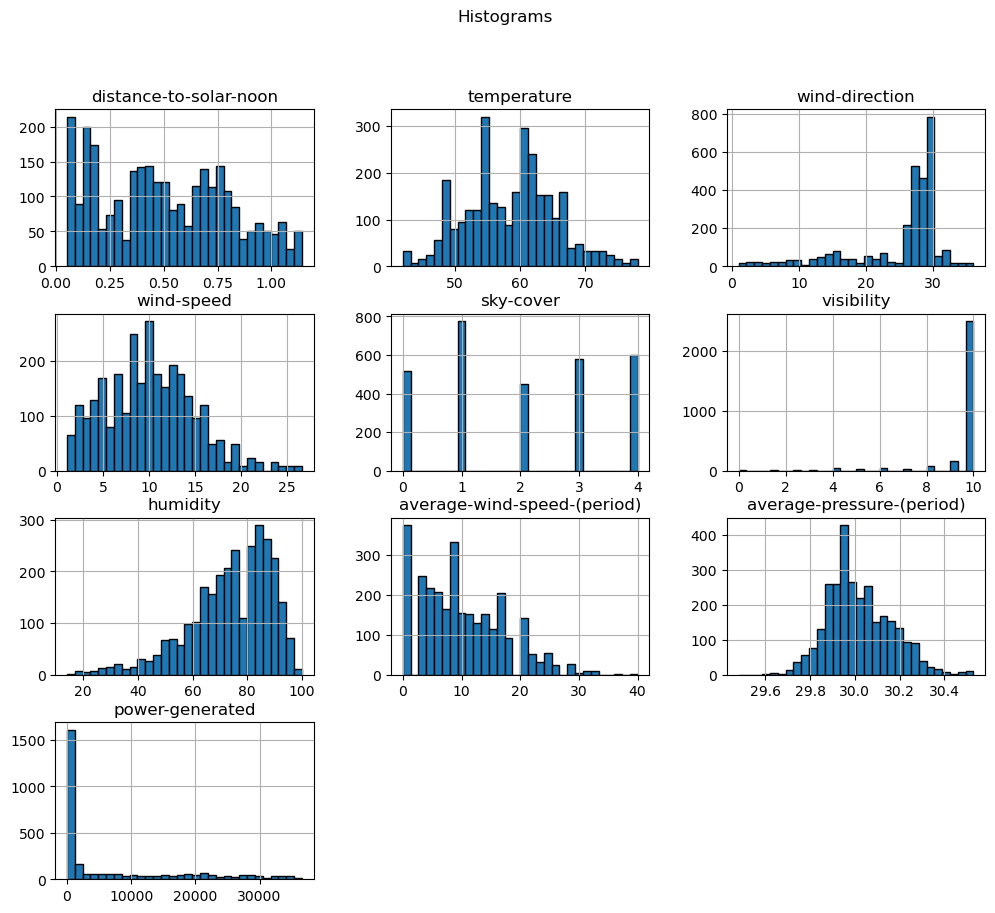

In [13]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms')
plt.show()

# Correlation Heatmap

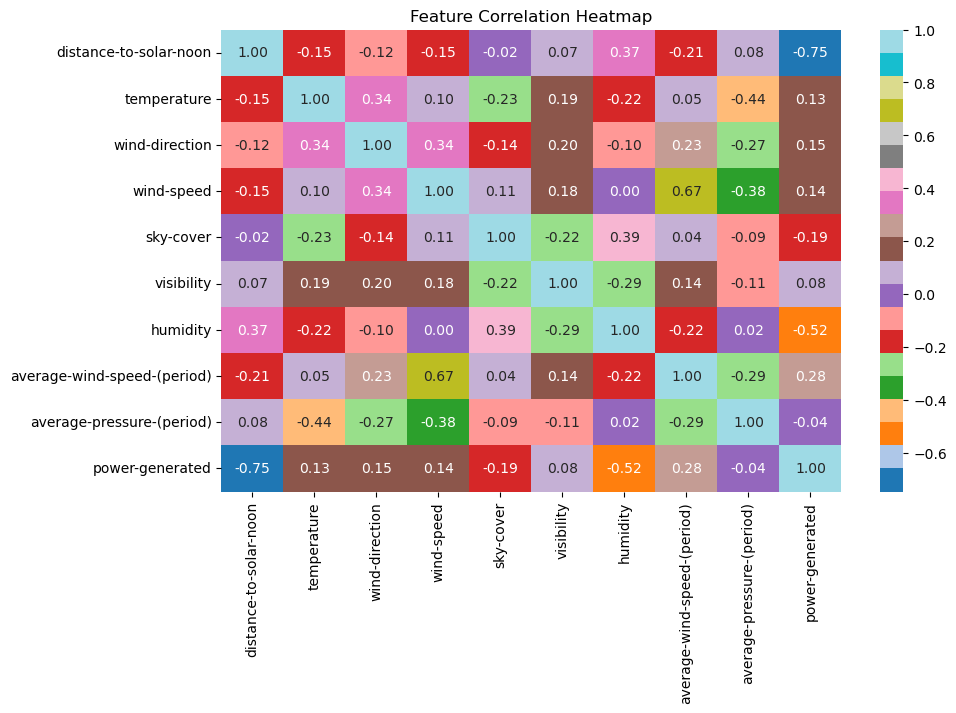

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='tab20', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

#Relationship between Features and Target

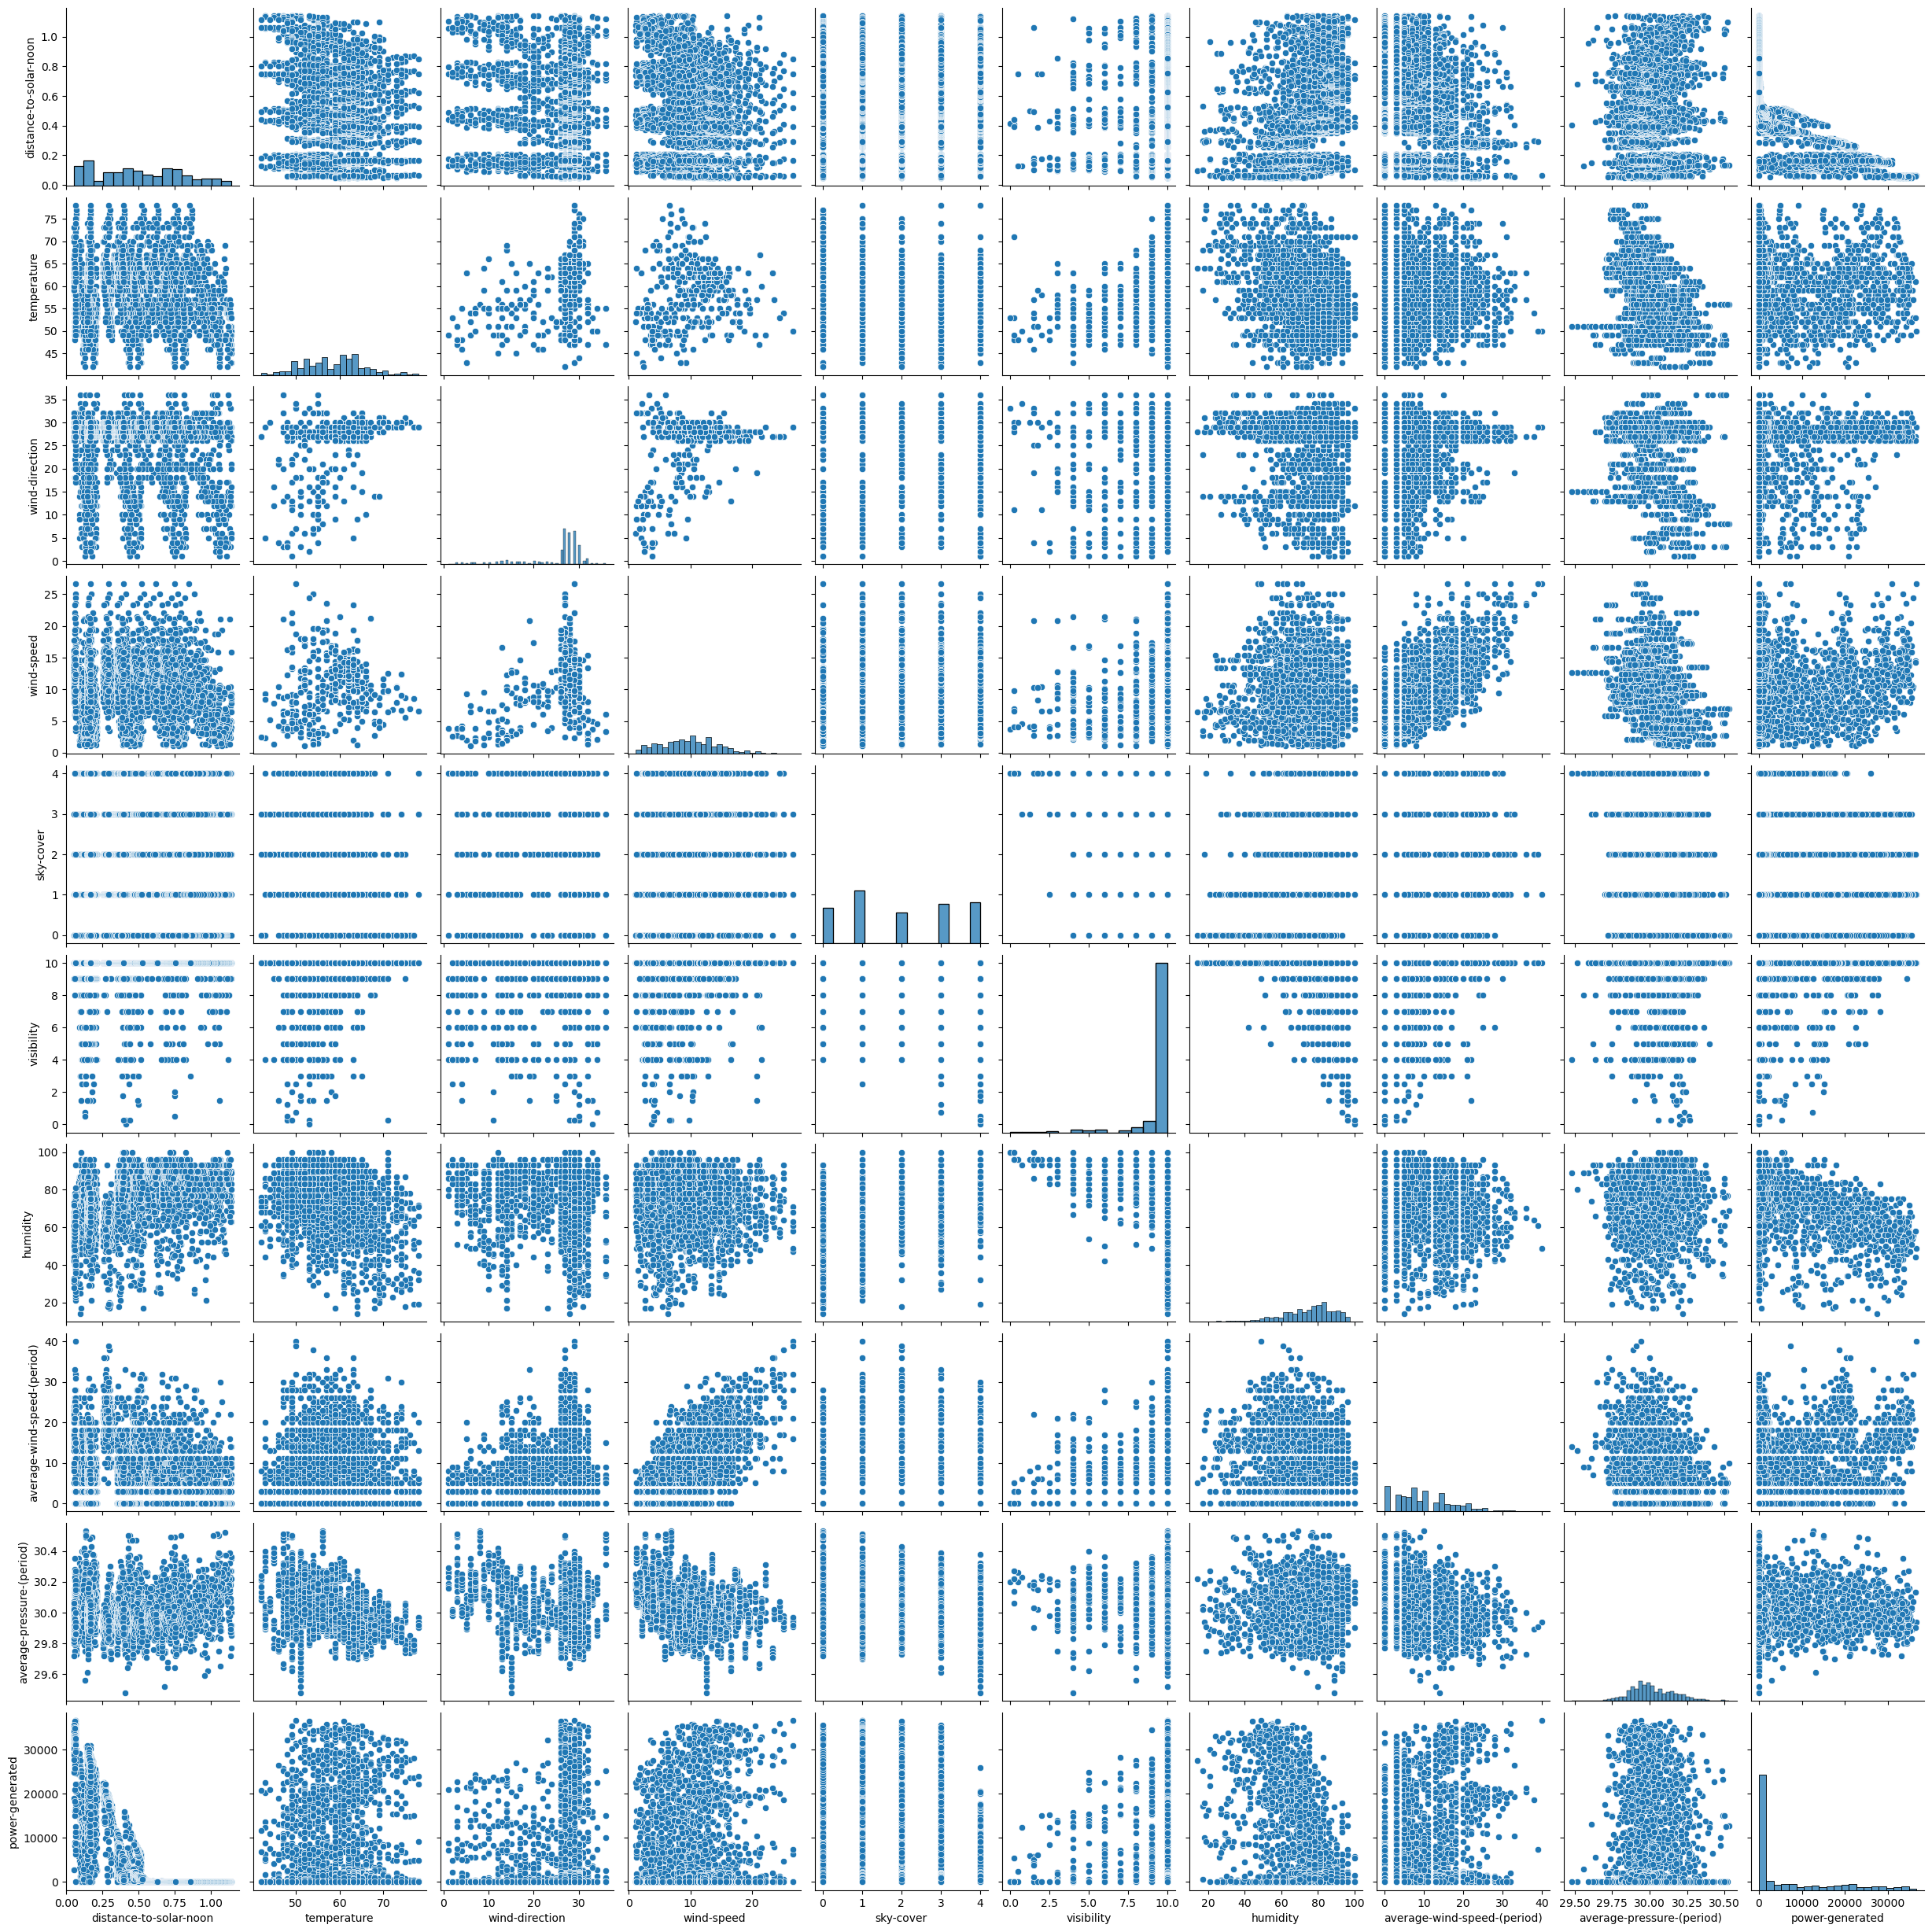

In [15]:
sns.pairplot(df, vars=['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'])
plt.show()

#Boxplot to Detect Outliers

In [16]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a facet grid of box plots
fig = px.box(df.melt(value_vars=numerical_columns), 
             y='value', x='variable', 
             title="Box Plots of Numerical Features")

fig.show()

In [17]:
df_grouped = df.groupby('temperature', as_index=False)['power-generated'].sum()

# Create a line plot using Plotly Express
fig = px.line(df_grouped, x='temperature', y='power-generated', 
              title='line Plot of Temperature vs Power Generated')

fig.show()

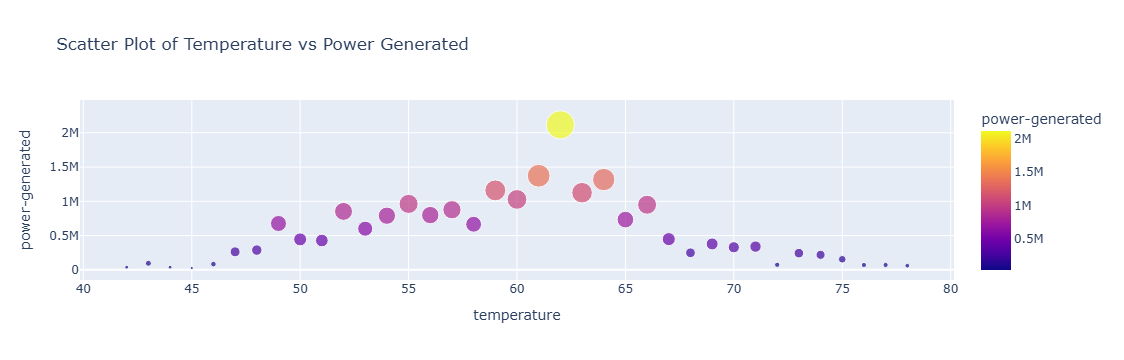

In [18]:
# Group by 'Temperature' and sum 'Power Generated'
df_grouped = df.groupby('temperature', as_index=False)['power-generated'].sum()

# Create a scatter plot
fig = px.scatter(df_grouped, x='temperature', y='power-generated', 
                 title='Scatter Plot of Temperature vs Power Generated',
                 color='power-generated',  # Optional: Adds color variation
                 size='power-generated',   # Optional: Adjusts point size
                 hover_data=['power-generated'])  # Shows value on hover

fig.show()

# Feature Engineering

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
# Define target and features
target = df[['power-generated']]
features = df.drop(columns=['power-generated'])

In [21]:
# Standardize numerical features
std_sca = StandardScaler()
numerical_col = [col for col in features.columns if features[col].dtype != 'O']
features[numerical_col] = std_sca.fit_transform(features[numerical_col])

In [22]:
# Perform PCA to combine 'wind-speed' and 'average-wind-speed-(period)'
df1 = features[['wind-speed', 'average-wind-speed-(period)']]
pca = PCA(n_components=1)
principal_component = pca.fit_transform(df1)
df1['Combined_Feature'] = principal_component

C:\Users\muska\AppData\Local\Temp\ipykernel_15368\13066907.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# Concatenate new feature with target
df2 = pd.concat([df1[['Combined_Feature']], target], axis=1)

In [24]:
# Check correlation
df2['Combined_Feature'].corr(df2['power-generated'])

0.23003050053685214

In [25]:
# Remove 'wind-speed' from features
features.drop(columns=['wind-speed'], inplace=True)

In [26]:
features

distance-to-solar-noon  temperature  wind-direction  sky-cover  \
0                   1.196765     1.539688        0.440639  -1.407962   
1                   0.420310     1.539688        0.440639  -1.407962   
2                  -0.356146     1.539688        0.440639  -1.407962   
3                  -1.132602     1.539688        0.440639  -1.407962   
4                  -1.469066     1.539688        0.440639  -1.407962   
...                      ...          ...             ...        ...   
2915               -1.130442     0.662498        0.296005   1.425428   
2916               -1.474208     0.662498        0.296005  -0.699615   
2917               -0.700735     0.662498        0.296005   0.008733   
2918                0.072738     0.662498        0.296005   0.008733   
2919                0.846211     0.662498        0.296005  -0.699615   

      visibility  humidity  average-wind-speed-(period)  \
0       0.319659  0.098597                    -0.293255   
1       0.319659  0.231271                    -0.706530   
2       0.319659 -0.233088                    -1.395322   
3       0.319659 -2.687555                    -1.395322   
4       0.319659 -3.483598                    -0.982047   
...          ...       ...                          ...   
2915    0.319659  0.098597                    -0.017739   
2916    0.319659 -0.498436                     0.671053   
2917    0.319659 -0.365762                     1.497603   
2918    0.319659  0.496618                     0.946570   
2919    0.319659  0.496618                     0.120020   

      average-pressure-(period)  
0                     -1.392859  
1                     -1.181564  
2                     -0.899837  
3                     -0.758974  
4                     -0.899837  
...                         ...  
2915                  -0.618111  
2916                  -0.758974  
2917                  -0.970269  
2918                  -1.040701  
2919                  -0.829406  

[2920 rows x 8 columns]

# Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Model Performance:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2 Score): {r2}\n")


Linear Regression Model Performance:
Mean Absolute Error (MAE): 4982.868421849611
Mean Squared Error (MSE): 39499688.487766646
Root Mean Squared Error (RMSE): 6284.87776235677
R-squared (R2 Score): 0.6250164060465453



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Model Performance:
Mean Absolute Error (MAE): 1554.902089041096
Mean Squared Error (MSE): 11702838.233049657
Root Mean Squared Error (RMSE): 3420.941132648976
R-squared (R2 Score): 0.8889010899049503

Decision Tree Model Performance:
Mean Absolute Error (MAE): 1985.9195205479452
Mean Squared Error (MSE): 19967652.148972604
Root Mean Squared Error (RMSE): 4468.517891759258
R-squared (R2 Score): 0.810440480614091

XGBoost Model Performance:
Mean Absolute Error (MAE): 1626.375887466212
Mean Squared Error (MSE): 11051366.378063982
Root Mean Squared Error (RMSE): 3324.3595440421277
R-squared (R2 Score): 0.8950857520103455



In [42]:
import xgboost as xgb
# Define Model & Hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get Best Model
best_model = grid_search.best_estimator_

# Evaluate Performance
y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nRMSE: {rmse:.2f}\nR² Score: {r2:.4f}")

# Save Model & Scaler
best_model.save_model("solar_model.json")
np.save("scaler.npy", scaler.mean_)
np.save("scale_factor.npy", scaler.scale_)

print("Model and scaler saved successfully.")

Model Performance:
RMSE: 3259.01
R² Score: 0.8992
Model and scaler saved successfully.


In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming X_train was used in training (Make sure it has 8 features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Replace X_train with your actual training data

# Save the correct scaler values
np.save("scaler.npy", scaler.mean_)  # Save mean
np.save("scale_factor.npy", scaler.scale_)  # Save scale factor

print("✅ New scaler saved successfully! Make sure X_train has 8 features.")

✅ New scaler saved successfully! Make sure X_train has 8 features.
